In [2]:
import pandas as pd

glucose = pd.read_csv("data/GLUCOSE_training_data_final.csv")

In [2]:
glucose.head()

,experiment_id,story_id,worker_id,submission_time_normalized,worker_quality_rating,selected_sentence_index,story,selected_sentence,1_specificNL,1_specificStructured,...,8_generalStructured,9_specificNL,9_specificStructured,9_generalNL,9_generalStructured,10_specificNL,10_specificStructured,10_generalNL,10_generalStructured,number_filled_in
0,e56c7c3e-4660-40fb-80d0-052d566d676a__4,e56c7c3e-4660-40fb-80d0-052d566d676a,19,20190930,3,4,It was bedtime at our house. Two of the three ...,Finally he becomes tired and falls asleep.,The third kid continues to get out of bed and...,{The third kid}_[subject] {continues}_[verb] {...,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,2
1,b03eba12-db74-4fce-a3cc-c743948ef8c2__4,b03eba12-db74-4fce-a3cc-c743948ef8c2,2,20200115,1,4,Sara was invited to the football game. She sho...,"At the end of the game, her team won.",Sara goes to a football game >Causes/Enabl...,{Sara }_[subject] {goes }_[verb] {to }_[prepos...,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,3
2,7e7aeb03-12d8-4f02-9097-c3273a692f20__3,7e7aeb03-12d8-4f02-9097-c3273a692f20,60,20191230,1,3,Kyle was leaving to pick up his sister from wo...,He decided to check his dirty clothes basket.,Kyle realized his keys were missing >Causes/En...,{Kyle}_[subject] {realized}_[verb] {his keys}_...,...,escaped,escaped,escaped,escaped,escaped,He decided to check his dirty clothes basket f...,{He}_[subject] {decided to check}_[verb] {his ...,Someone_A decided to check Something_A (that h...,{Someone_A}_[subject] {decided to check}_[verb...,5
3,a2bb14bd-9094-4dcc-93a5-bb93b1c308a5__4,a2bb14bd-9094-4dcc-93a5-bb93b1c308a5,142,20191203,2,4,MY DAUGHTER HAD TO DO A SCIENCE PROJECT. SO SH...,SO CHEWING GUM CAN HELP WITH YOUR CONCENTRATIO...,My daughter has a science project >Causes/En...,{My daughter}_[subject] {has }_[verb] {a }_[pr...,...,escaped,Chewing gum can help with concentration >Resul...,{Chewing gum}_[subject] {can help}_[verb] {wit...,Chewing gum can help with concentration >Resul...,{Chewing gum}_[subject] {can help}_[verb] {wit...,escaped,escaped,escaped,escaped,7
4,b8c68631-fa42-40a0-93c7-6739402e2038__4,b8c68631-fa42-40a0-93c7-6739402e2038,19,20191213,3,4,Vivian couldn't stop thinking about that man s...,Vivian spent the rest of her life chasing that...,escaped,escaped,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,2


In [5]:
len(glucose.query("`1_specificNL` != 'escaped' and `2_specificNL` != 'escaped'"))

33073

In [6]:
len(glucose.query("`6_specificNL` != 'escaped' and `7_specificNL` != 'escaped'"))

30461

In [8]:
glucose.query("`6_specificNL` != 'escaped' and `7_specificNL` != 'escaped'").iloc[0]["6_specificNL"]

"Chewing gum can help with concentration >Causes/Enables> I believe my daughter's hypothesis"

In [9]:
glucose.query("`6_specificNL` != 'escaped' and `7_specificNL` != 'escaped'").iloc[0]["7_specificNL"]

'Chewing gum can help with concentration >Causes> I feel(s) proud'

In [3]:
glucose.columns

Index(['experiment_id', 'story_id', 'worker_id', 'submission_time_normalized',
       'worker_quality_rating', 'selected_sentence_index', 'story',
       'selected_sentence', '1_specificNL', '1_specificStructured',
       '1_generalNL', '1_generalStructured', '2_specificNL',
       '2_specificStructured', '2_generalNL', '2_generalStructured',
       '3_specificNL', '3_specificStructured', '3_generalNL',
       '3_generalStructured', '4_specificNL', '4_specificStructured',
       '4_generalNL', '4_generalStructured', '5_specificNL',
       '5_specificStructured', '5_generalNL', '5_generalStructured',
       '6_specificNL', '6_specificStructured', '6_generalNL',
       '6_generalStructured', '7_specificNL', '7_specificStructured',
       '7_generalNL', '7_generalStructured', '8_specificNL',
       '8_specificStructured', '8_generalNL', '8_generalStructured',
       '9_specificNL', '9_specificStructured', '9_generalNL',
       '9_generalStructured', '10_specificNL', '10_specificStructured

In [4]:
sample = glucose.sample(1)

In [8]:
sample.story.item()

'Alex did not like birthday cake. His girlfriend knew that. His favorite sweet was cookies. So she make him a cookie cake. Alex was so surprised and loved it.'

In [9]:
sample.selected_sentence.item()

'Alex was so surprised and loved it.'

In [12]:
for col in sample.columns:
    if "specific" in col or "general" in col:
        print(f"{col}: {sample[col].item()}")

1_specificNL: Alex gets a cookie cake >Causes/Enables> Alex loves it
1_specificStructured: {Alex}_[subject] {gets}_[verb] {a cookie cake}_[object1] >Causes/Enables> {Alex}_[subject] {loves}_[verb] {it}_[object1]
1_generalNL: Someone_A gets Something_A >Causes/Enables> Someone_A loves Something_A
1_generalStructured: {Someone_A}_[subject] {gets}_[verb] {Something_A}_[object1] >Causes/Enables> {Someone_A}_[subject] {loves}_[verb] {Something_A}_[object1]
2_specificNL: escaped
2_specificStructured: escaped
2_generalNL: escaped
2_generalStructured: escaped
3_specificNL: escaped
3_specificStructured: escaped
3_generalNL: escaped
3_generalStructured: escaped
4_specificNL: Alex possess(es) a cookie cake >Enables> Alex loves the cake
4_specificStructured: {Alex}_[subject] {possess(es)}_[verb] {a cookie cake}_[object] >Enables> {Alex}_[subject] {loves}_[verb] {the cake}_[object1]
4_generalNL: Someone_A possess(es) Something_A >Enables> Someone_A loves Something_A
4_generalStructured: {Someone_A}

In [1]:
import pandas as pd

t5_data = pd.read_csv("glucose/t5_data/t5_training_data.tsv", sep="\t", header=None)

In [2]:
t5_data.head()

,0,1
0,2: *Tim got a new dog.* He tried to teach it f...,Tim like(s) dogs >Motivates> Tim got a new dog...
1,6: *Tim got a new dog.* He tried to teach it f...,Tim got a dog >Causes/Enables> Tim tried to te...
2,9: *Tim got a new dog.* He tried to teach it f...,Tim got a dog >Results in> Tim possess(es) a d...
3,7: The family hamster had escaped. *They were ...,The family hamster has escaped >Causes> We fee...
4,1: Kate threw a frisbee to her dog. The dog ca...,Kate's dog caught a frisbee >Causes/Enables> K...


In [5]:
t5_data.iloc[0][0]

'2: *Tim got a new dog.* He tried to teach it fetch. The dog would not fetch. Tim kept trying for five weeks. Soon, the dog was great at playing fetch.'

In [6]:
t5_data.iloc[0][1]

'Tim like(s) dogs >Motivates> Tim got a new dog ** Someone_A like(s) Something_A >Motivates> Someone_A got Something_A'

In [3]:
import pandas as pd
from transformers import T5Tokenizer
from glucose_t5_utils import GlucoseDataset

glucose_t5 = pd.read_csv("data/t5_training_data.tsv", sep="\t", header=None)
glucose_t5_specific = pd.DataFrame()
glucose_t5_specific["input"] = glucose_t5.iloc[:, 0]
glucose_t5_specific["target"] = glucose_t5.iloc[:, 1].apply(lambda x: x.split("**")[0].strip())
tokenizer = T5Tokenizer.from_pretrained("t5-large")
ds = GlucoseDataset(glucose_t5_specific, tokenizer)

/Users/mismayil/.pyenv/versions/3.9.7/envs/op/lib/python3.9/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [4]:
ds[0]

{'input_ids': tensor([  204,    10,  1429,   382,   603,   530,     3,     9,   126,  1782,
             5,  1935,   216,  1971,    12,  3884,    34, 27109,     5,    37,
          1782,   133,    59, 27109,     5,  4485,  2697,  1119,    21,   874,
          1274,     5, 14902,     6,     8,  1782,    47,   248,    44,  1556,
         27109,     5,     1,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [1]:
import pandas as pd

glucose_test = pd.read_csv("../glucose/test/test_set_answer_key.csv")

In [2]:
glucose_test.columns

Index(['unique_id', 'story', 'selected_sentence', 'worker_ids', '1_specificNL',
       '1_generalNL', '2_specificNL', '2_generalNL', '3_specificNL',
       '3_generalNL', '4_specificNL', '4_generalNL', '5_specificNL',
       '5_generalNL', '6_specificNL', '6_generalNL', '7_specificNL',
       '7_generalNL', '8_specificNL', '8_generalNL', '9_specificNL',
       '9_generalNL', '10_specificNL', '10_generalNL'],
      dtype='object')

In [3]:
glucose_test.head()

,unique_id,story,selected_sentence,worker_ids,1_specificNL,1_generalNL,2_specificNL,2_generalNL,3_specificNL,3_generalNL,...,6_specificNL,6_generalNL,7_specificNL,7_generalNL,8_specificNL,8_generalNL,9_specificNL,9_generalNL,10_specificNL,10_generalNL
0,00294500-d3fe-4bf5-883f-55118bca417c__3,Meg went shopping.****She found a sweater she ...,Three weeks later the sweater went on sale.,A2MHM7JK1T9XHR****A2CMYWI1J292YJ****AGTKQI9PCODC5,escaped,escaped,escaped,escaped,escaped,escaped,...,The sweater went on sale >Causes/Enables> Meg...,Something_A goes on sale >Causes/Enables> Som...,The sweater goes on sale >Causes> Meg feel(s)...,Something_A goes on sale >Causes> Someone_A ...,escaped,escaped,escaped,escaped,escaped,escaped
1,013fe112-3557-4e5f-8617-cb5eac764df1__1,The football team had worked hard all season.*...,They won regionals and were on the way to the ...,A2NGMLBFZ3YQP5****A2MHM7JK1T9XHR****A33DSCVAUO...,The football team had worked hard all season. ...,Some People_A (who are a team) work hard >Caus...,escaped,escaped,escaped,escaped,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped
2,013fe112-3557-4e5f-8617-cb5eac764df1__3,The football team had worked hard all season.*...,The team had to use the second string quarterb...,A33DSCVAUOWIQY****A2MHM7JK1T9XHR****A1UYU9PV26...,The quarterback breaks his arm >Causes/Enables...,Someone_A (who is the first choice to play in ...,The team want(s) a quarterback >Motivates> The...,Some People_A want(s) Someone_B (who is on the...,escaped,escaped,...,The team has to use the second string quarterb...,Some People_A (who are a sports team) use Some...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped
3,01f094f4-e770-42e4-b6cd-6604ac58d810__3,Aaron was coming home from a football game.***...,He pops his hood and smoke flies everywhere.,A1NPSBHME4MVX4****ATR6RB1RULOC0****A33DSCVAUOWIQY,escaped,escaped,escaped,escaped,escaped,escaped,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped
4,035e99b6-c39f-4fe7-b5ef-a19fdc4f138f__2,Martin heard a noise.****He looked up to see a...,He screamed and ran upstairs.,A3PPLDHC3CG0YN****A3L0I55SEJU1HJ****A39TKG862P...,escaped,escaped,Martin feel(s) scared >Motivates> Martin scre...,Someone_A feel(s) scared >Motivates> Someone_A...,escaped,escaped,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped


In [4]:
glucose_test.iloc[0]["story"]

'Meg went shopping.****She found a sweater she really liked.****The sweater was too expensive for Meg to buy.****Three weeks later the sweater went on sale.****Meg was very happy to finally be able to buy the sweater.'

In [5]:
def prepare_glucose_t5_input(glucose_row, dim=1):
    story = glucose_row["story"]
    selected_sentence = glucose_row["selected_sentence"]
    sentences = story.split("****")
    story_starred = " ".join([f"*{sentence}*" if sentence.strip() == selected_sentence.strip() else sentence for sentence in sentences])
    return f"{dim}: {story_starred}"

prepare_glucose_t5_input(glucose_test.iloc[0])

'1: Meg went shopping. She found a sweater she really liked. The sweater was too expensive for Meg to buy. *Three weeks later the sweater went on sale.* Meg was very happy to finally be able to buy the sweater.'

In [7]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
    
tokenizer = T5Tokenizer.from_pretrained("t5-large")
model = T5ForConditionalGeneration.from_pretrained("/scratch/mete/glucose_t5_general_out/checkpoint-147900")

input_ids = tokenizer(prepare_glucose_t5_input(glucose_test.iloc[0], dim=6), return_tensors="pt").input_ids
outputs = model.generate(input_ids, max_length=512)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/root/.conda/envs/op/lib/python3.9/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Something_A (that is a sweater ) went on sale >Causes/Enables> Someone_A bought Something_A


In [1]:
import pandas as pd
import sacrebleu

eval_data = pd.read_csv("glucose_test_general_with_preds.csv")

In [2]:
eval_data.head()

,Unnamed: 0,input,references,dimension,prediction
0,0,6: Meg went shopping. She found a sweater she ...,['Something_A goes on sale >Causes/Enables> S...,6,Something_A (that is a sweater ) went on sale ...
1,1,7: Meg went shopping. She found a sweater she ...,['Something_A goes on sale >Causes> Someone_...,7,Something_A (that is expensive) goes on sale >...
2,2,1: The football team had worked hard all seaso...,['Some People_A (who are a team) work hard >Ca...,1,Some People_A (who are a sports team) work har...
3,3,1: The football team had worked hard all seaso...,['Someone_A (who is the first choice to play i...,1,Someone_A breaks Something_A (that is a bone )...
4,4,2: The football team had worked hard all seaso...,['Some People_A want(s) Someone_B (who is on t...,2,Some People_A (who are a team) want(s) success...


In [27]:
bleu_by_dim = {dim: 0 for dim in range(1, 11)}

for dim in range(1, 11):
    dim_eval_data = eval_data[eval_data.dimension == dim]
    references = dim_eval_data.references.apply(lambda r: [s.strip().strip("'") for s in r.rstrip("]").strip("[").split(",")]).to_list()
    bleu_by_dim[dim] = sacrebleu.corpus_bleu(dim_eval_data.prediction.to_list(), references).score
    

In [28]:
bleu_by_dim

{1: 82.96218383195821,
 2: 78.93965232499185,
 3: 84.38292578221227,
 4: 88.72172295458444,
 5: 64.10679160572177,
 6: 76.81760537097631,
 7: 80.81255195239677,
 8: 83.68367983783958,
 9: 73.58710426786065,
 10: 71.03289184164383}

In [1]:
import pandas as pd

glucose = pd.read_csv("data/GLUCOSE_training_data_final.csv")

In [57]:
glucose.head()

,experiment_id,story_id,worker_id,submission_time_normalized,worker_quality_rating,selected_sentence_index,story,selected_sentence,1_specificNL,1_specificStructured,...,8_generalStructured,9_specificNL,9_specificStructured,9_generalNL,9_generalStructured,10_specificNL,10_specificStructured,10_generalNL,10_generalStructured,number_filled_in
0,e56c7c3e-4660-40fb-80d0-052d566d676a__4,e56c7c3e-4660-40fb-80d0-052d566d676a,19,20190930,3,4,It was bedtime at our house. Two of the three ...,Finally he becomes tired and falls asleep.,The third kid continues to get out of bed and...,{The third kid}_[subject] {continues}_[verb] {...,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,2
1,b03eba12-db74-4fce-a3cc-c743948ef8c2__4,b03eba12-db74-4fce-a3cc-c743948ef8c2,2,20200115,1,4,Sara was invited to the football game. She sho...,"At the end of the game, her team won.",Sara goes to a football game >Causes/Enabl...,{Sara }_[subject] {goes }_[verb] {to }_[prepos...,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,3
2,7e7aeb03-12d8-4f02-9097-c3273a692f20__3,7e7aeb03-12d8-4f02-9097-c3273a692f20,60,20191230,1,3,Kyle was leaving to pick up his sister from wo...,He decided to check his dirty clothes basket.,Kyle realized his keys were missing >Causes/En...,{Kyle}_[subject] {realized}_[verb] {his keys}_...,...,escaped,escaped,escaped,escaped,escaped,He decided to check his dirty clothes basket f...,{He}_[subject] {decided to check}_[verb] {his ...,Someone_A decided to check Something_A (that h...,{Someone_A}_[subject] {decided to check}_[verb...,5
3,a2bb14bd-9094-4dcc-93a5-bb93b1c308a5__4,a2bb14bd-9094-4dcc-93a5-bb93b1c308a5,142,20191203,2,4,MY DAUGHTER HAD TO DO A SCIENCE PROJECT. SO SH...,SO CHEWING GUM CAN HELP WITH YOUR CONCENTRATIO...,My daughter has a science project >Causes/En...,{My daughter}_[subject] {has }_[verb] {a }_[pr...,...,escaped,Chewing gum can help with concentration >Resul...,{Chewing gum}_[subject] {can help}_[verb] {wit...,Chewing gum can help with concentration >Resul...,{Chewing gum}_[subject] {can help}_[verb] {wit...,escaped,escaped,escaped,escaped,7
4,b8c68631-fa42-40a0-93c7-6739402e2038__4,b8c68631-fa42-40a0-93c7-6739402e2038,19,20191213,3,4,Vivian couldn't stop thinking about that man s...,Vivian spent the rest of her life chasing that...,escaped,escaped,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,escaped,2


In [13]:
glucose.iloc[2502].story

'We bought a vcr in 2014. I did not want to pay $10 a month for a dvr. The vcr did not record properly and we returned it. We ended up getting a dvr in 2015. The dvr is much better than a vcr.'

In [7]:
glucose.iloc[3].selected_sentence_index

4

In [14]:
glucose.iloc[2502].selected_sentence

'I did not want to pay $10 a month for a dvr.'

In [12]:
from utils import get_sents

get_sents(glucose.iloc[2502].story)

['We bought a vcr in 2014.',
 'I did not want to pay $10 a month for a dvr.',
 'The vcr did not record properly and we returned it.',
 'We ended up getting a dvr in 2015.',
 'The dvr is much better than a vcr.']

In [16]:
import re
re.split(re.escape(glucose.iloc[2502].selected_sentence), glucose.iloc[2502].story)

['We bought a vcr in 2014. ',
 ' The vcr did not record properly and we returned it. We ended up getting a dvr in 2015. The dvr is much better than a vcr.']

In [8]:
glucose.iloc[3]["1_specificNL"]

'My daughter has  a  science project >Causes/Enables> Chewing gum  can help  with  concentration'

In [3]:
glucose.sample(10).to_csv("outputs/glucose_train_samples.csv")

In [27]:
import pandas as pd

overlap_df = pd.read_csv("outputs/glucose_train_samples_with_overlap_0.0_dim_16_story_dbo.csv")

In [28]:
overlap_df

,Unnamed: 0.1,Unnamed: 0,experiment_id,story_id,worker_id,submission_time_normalized,worker_quality_rating,selected_sentence_index,story,selected_sentence,...,9_specificStructured,9_generalNL,9_generalStructured,10_specificNL,10_specificStructured,10_generalNL,10_generalStructured,number_filled_in,1_story_overlap_0.0,6_story_overlap_0.0
0,0,49881,1c2e442d-45ba-46e8-b5f2-aae9064cbf2e__1,1c2e442d-45ba-46e8-b5f2-aae9064cbf2e,224,20191219,2,1,I told Frankie to go to the store and get groc...,He put on his jacket and went on his way.,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,8,"[True, False]","[False, False]"
1,1,3022,210c7b15-4ffc-49b2-b18c-b3cfe08ac7d1__3,210c7b15-4ffc-49b2-b18c-b3cfe08ac7d1,101,20200102,1,3,Max loved to cook. He spent all day looking fo...,He presented the meal to his girlfriend.,...,{Max}_[subject] {gave }_[verb] {the meal }_[ob...,Someone_A gave Something_A (that is the meal ...,{Someone_A}_[subject] {gave }_[verb] {Somethin...,escaped,escaped,escaped,escaped,8,"[False, False]","[True, True]"
2,2,53061,6a6a51a9-2c09-40f4-b1cb-e059fb21642e__3,6a6a51a9-2c09-40f4-b1cb-e059fb21642e,1,20191012,2,3,The man got a flat. He stopped to change his t...,A car didn't see him there working.,...,escaped,escaped,escaped,The driver of the approaching car didn't see t...,{The driver of the approaching car}_[subject] ...,The driver of the approaching car didn't see S...,{The driver of the approaching car}_[subject] ...,7,"[False, False]","[True, True]"
3,3,27140,b7af2d6c-44a5-48b9-a42b-71de7de8d37d__2,b7af2d6c-44a5-48b9-a42b-71de7de8d37d,14,20191026,2,2,Megan decided to cook mashed potatoes. She had...,She bought all the ingredients.,...,{Megan}_[subject] {buys}_[verb] {the ingredien...,Someone_A buys Something_A >Results in> Someon...,{Someone_A}_[subject] {buys}_[verb] {Something...,escaped,escaped,escaped,escaped,5,"[False, False]","[True, True]"
4,4,49471,e2acb784-376b-4eb6-b78b-3a23dbe43222__4,e2acb784-376b-4eb6-b78b-3a23dbe43222,19,20191204,3,4,Andrew's dad woke Andrew up early to rake the ...,Him and his dad went to the movies after.,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,6,"[True, False]","[False, False]"
5,5,8130,6930c038-b0c0-44ee-b02b-d72e4fca9a0d__2,6930c038-b0c0-44ee-b02b-d72e4fca9a0d,101,20191109,1,2,Harry made some food. He put it in the oven to...,He went outside to work.,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,7,"[False, False]","[True, True]"
6,6,15675,9cb68f62-3fa7-4afa-839e-f7c09c28bce1__1,9cb68f62-3fa7-4afa-839e-f7c09c28bce1,267,20190912,1,1,Once I went to a hockey game. All the beer the...,All the beer there was very expensive.,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,2,"[False, False]","[None, None]"
7,7,45921,da6c152a-80cf-43a2-97ce-3f2f1427cd3c__0,da6c152a-80cf-43a2-97ce-3f2f1427cd3c,2,20191106,1,0,On my birthday my friend gave me a present. Th...,On my birthday my friend gave me a present.,...,{My friend }_[subject] {gives}_[verb] {me }_[o...,Someone_A gives Someone_B Something_A (that i...,{Someone_A}_[subject] {gives }_[verb] {Someone...,escaped,escaped,escaped,escaped,6,"[False, False]","[False, False]"
8,8,6784,bdf7c00b-6b28-4ec6-9710-d909a66e7ddd__4,bdf7c00b-6b28-4ec6-9710-d909a66e7ddd,2,20200129,1,4,Arlene still felt weak from a previous illness...,Arlene ended up competing in the match and had...,...,escaped,escaped,escaped,escaped,escaped,escaped,escaped,2,"[False, False]","[False, False]"
9,9,43889,9004bd4d-186c-4755-9bf0-6eee2329d3db__0,9004bd4d-186c-4755-9bf0-6eee2329d3db,142,20191224,2,0,It was hot and David wanted a treat. He heard ...,It was hot and David wanted a treat.,...,{Today}_[subject] {is}_[verb] {hot and David w...,Today is hot and Someone_A wants a treat >Resu...,{Today}_[subject] {is}_[verb] {hot and Someone...,Today is hot and David wants a treat >Results...,{Today }_[subject] {is}_[verb] {hot and David ...,Today is hot and Someone_A wants a treat >Resu...,{Today}_[subject] {is}_[verb] {hot and Someon

In [47]:
overlap_df.iloc[4]["story"]

"Andrew's dad woke Andrew up early to rake the backyard. Andrew was sleepy and hated to do this. But his dad promised him they would go to the movies if he did it. So Andrew got it done in an hour. Him and his dad went to the movies after."

In [48]:
overlap_df.iloc[4]["selected_sentence"]

'Him and his dad went to the movies after.'

In [49]:
overlap_df.iloc[4]["1_specificNL"]

"Andrew's dad promises they would go to  the movies >Causes/Enables> Andrew and his dad go to  the movies"

In [50]:
overlap_df.iloc[4]["1_generalNL"]

'Someone_A promises Someone_B they would do Something_A >Causes/Enables> Someone_A and Someone_B do Something_A'

In [51]:
overlap_df.iloc[4]["1_story_overlap_0.0"]

'[True, False]'

In [52]:
overlap_df.iloc[4]["6_specificNL"]

'Andrew and his dad go to  the movies >Causes/Enables> Andrew and his dad watch the movie'

In [53]:
overlap_df.iloc[4]["6_generalNL"]

'Someone_A and Someone_B go to  the movies >Causes/Enables> Someone_A and Someone_B watch the movie'

In [55]:
overlap_df.iloc[4]["6_story_overlap_0.0"]

'[False, False]'

In [27]:
import pandas as pd

overlap_df = pd.read_csv("large_outputs/GLUCOSE_training_data_final_with_overlap_0.0_dim_16_s_dbo.csv")

In [28]:
test_sample = overlap_df[overlap_df["1_story_overlap_0.0"] == "[False, False]"].sample(1)

In [29]:
for col in ["story", "selected_sentence", "1_specificNL", "1_generalNL"]:
    print(test_sample.iloc[0][col], end="\n\n")

I just moved into a new apartment. Now I need to put up all of my wall decorations. I have nails and screws, but no tools. I am using a roll of quarters as a hammer. It is not working too well, and I will have to seek tools.

Now I need to put up all of my wall decorations.

I move into  a new apartment >Causes/Enables> I need to  put up  wall decorations

Someone_A moves into  a new home >Causes/Enables> Someone_A needs to  put up  Something_A



In [22]:
for col in ["story", "selected_sentence", "1_specificNL", "1_generalNL"]:
    print(test_sample.iloc[0][col], end="\n\n")

I brought home a girl from the bar last night. In the middle of the night I woke up to her staring at me. I asked her why she was staring at me, but no answer. I shined my phone light in her eyes and all I saw were whites. This girl slept with her eyes opened, and I never called her again.

In the middle of the night I woke up to her staring at me.

I brought home a girl from a bar last night >Causes/Enables> I woke up  to her staring at me

Someone_A brings home Someone_B from Somewhere_A >Causes/Enables> Someone_A wakes up to Someone_B (staring) at Someone_A



In [1]:
from utils import get_words
words = get_words("I woke up  to her staring at me")
context_words = get_words("In the middle of the night I woke up to her staring at me.")
words, context_words

/Users/mismayil/.pyenv/versions/3.9.7/envs/op/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


({'stare', 'wake'}, {'middle', 'night', 'stare', 'wake'})

In [23]:
test_sample = overlap_df[overlap_df["1_story_overlap_0.0"] == "[True, True]"].sample(1)

In [24]:
for col in ["story", "selected_sentence", "1_specificNL", "1_generalNL"]:
    print(test_sample.iloc[0][col], end="\n\n")

Sam had to go grocery shopping. He left the grocery list that his wife had written for him. He ended up forgetting a lot of the items he needed. He had to return to the store again to get the things he forgot. He never forgot his list again.

He left the grocery list that his wife had written for him.

Sam goes shopping >Causes/Enables> Sam forgets his list

Someone_A goes Somewhere_A (that is a shop) >Causes/Enables> Someone_A forgots Something_A (that is Someone_A's shopping list)



In [29]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Sam forgets his list")

for token in doc:
    print(token.ent_id)

0
0
0
0


In [30]:
import pandas as pd

overlap_df = pd.read_csv("outputs/glucose_train_samples_with_overlap_0.1_dim_16_s.csv")

In [32]:
for i, row in overlap_df.iterrows():
    for col in ["story", "selected_sentence", "1_specificNL", "1_generalNL", "1_story_spec_overlap_0.1", "1_story_gen_overlap_0.1"]:
        print(row[col], end="\n\n")
    print()

I told Frankie to go to the store and get groceries. He put on his jacket and went on his way. After fifteen minutes I heard a knock on the door. I wasn't expecting Frankie for another hour but there he was. When I asked him how he came and went so fast he said he ran!

He put on his jacket and went on his way.

I ask Frankie an errand >Causes/Enables> Frankie goes on  his way to  the grocery store

Someone_A asks Someone_B an errand >Causes/Enables> Someone_B goes to  Somewhere_A with Someone_B's jacket

True

False


Max loved to cook. He spent all day looking for recipes. He slaved over the stove for hours. He presented the meal to his girlfriend. She loved it.

He presented the meal to his girlfriend.

Max cooked a meal  for  his girlfriend  >Causes/Enables> Max gave  the meal  to  his girlfriend

Someone_A cooked  Something_A (that is a meal ) for  Someone_B (who is Someone_A's girlfriend) >Causes/Enables> Someone_A gave  Something_A to  Someone_B

True

True


The man got a flat.

In [10]:
for col in ["story", "selected_sentence", "6_specificNL", "6_generalNL", "6_story_copy_overlap_0.8"]:
    print(overlap_df.iloc[0][col], end="\n\n")

I told Frankie to go to the store and get groceries. He put on his jacket and went on his way. After fifteen minutes I heard a knock on the door. I wasn't expecting Frankie for another hour but there he was. When I asked him how he came and went so fast he said he ran!

He put on his jacket and went on his way.

Frankie  goes on  his way >Causes/Enables> Frankie  runs to  the store

Someone_A goes on  his way for  an errand >Causes/Enables> Someone_A runs  to  Somewhere_A

[False, 'none', False, 'none']



In [33]:
import pandas as pd

overlap_df = pd.read_csv("outputs/GLUCOSE_training_data_final_with_overlap_0.2_dim_16_s.csv")

In [34]:
overlap_df.columns

Index(['Unnamed: 0', 'experiment_id', 'story_id', 'worker_id',
       'submission_time_normalized', 'worker_quality_rating',
       'selected_sentence_index', 'story', 'selected_sentence', '1_specificNL',
       '1_specificStructured', '1_generalNL', '1_generalStructured',
       '2_specificNL', '2_specificStructured', '2_generalNL',
       '2_generalStructured', '3_specificNL', '3_specificStructured',
       '3_generalNL', '3_generalStructured', '4_specificNL',
       '4_specificStructured', '4_generalNL', '4_generalStructured',
       '5_specificNL', '5_specificStructured', '5_generalNL',
       '5_generalStructured', '6_specificNL', '6_specificStructured',
       '6_generalNL', '6_generalStructured', '7_specificNL',
       '7_specificStructured', '7_generalNL', '7_generalStructured',
       '8_specificNL', '8_specificStructured', '8_generalNL',
       '8_generalStructured', '9_specificNL', '9_specificStructured',
       '9_generalNL', '9_generalStructured', '10_specificNL',
       '

In [38]:
test_sample = overlap_df.query("`1_story_spec_overlap_0.2` == False and `1_story_gen_overlap_0.2` == False")

In [39]:
for col in ["story", "selected_sentence", "1_specificNL", "1_generalNL"]:
    print(test_sample.iloc[0][col], end="\n\n")

Sara was invited to the football game. She showed up at the gates early. Then, she went inside. She spent most of the game wandering around. At the end of the game, her team won.

At the end of the game, her team won.

Sara  goes  to  a football game  >Causes/Enables> Her team  wins 

Someone_A goes  to  a sport's game  >Causes/Enables> Someone_A's team  wins 



In [40]:
test_sample = overlap_df.query("`6_story_spec_overlap_0.2` == False and `6_story_gen_overlap_0.2` == False")

In [42]:
for col in ["story", "selected_sentence", "6_specificNL", "6_generalNL"]:
    print(test_sample.iloc[0][col], end="\n\n")

Kyle was leaving to pick up his sister from work. When he got to the car he realized he was missing his keys. He looked through every room in his house but still couldn't find it. He decided to check his dirty clothes basket. He found his keys in the pocket of the pants he wore yesterday.

He decided to check his dirty clothes basket.

He decided to check his dirty clothes basket for his keys >Causes/Enables> He found his keys in his dirty clothes basket

Someone_A decided to check Something_A (that has dirty clothes) for Something_B >Causes/Enables> Someone_A found Something_B in Something_A (that has dirty clothes)

False



In [1]:
from utils import has_overlap, has_story_overlap
story = "Kyle was leaving to pick up his sister from work. When he got to the car he realized he was missing his keys. He looked through every room in his house but still couldn't find it. He decided to check his dirty clothes basket. He found his keys in the pocket of the pants he wore yesterday."

has_story_overlap("He decided to check his dirty clothes basket for his keys", "He found his keys in the pocket of the pants he wore yesterday.", story, 0.2, "He decided to check his dirty clothes basket.", 6)

/Users/mismayil/.pyenv/versions/3.9.7/envs/op/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
from utils import get_sents, get_words

get_words(" He found his keys in the pocket of the pants he wore yesterday.")

{'find',
 'he',
 'his',
 'in',
 'key',
 'of',
 'pant',
 'pocket',
 'the',
 'wear',
 'yesterday'}

In [1]:
import json

with open("data/glucose_cross_dim_data.json") as f:
    glucose = json.load(f)

In [2]:
len(glucose)

63534

In [7]:
import numpy as np

train_indices = np.random.choice(len(glucose), size=60000, replace=False)

In [9]:
train_data = [d for i, d in enumerate(glucose) if i in train_indices]
val_data = [d for i, d in enumerate(glucose) if i not in train_indices]

In [10]:
len(train_data), len(val_data)

(60000, 3534)

In [11]:
with open("data/glucose_cross_dim_train_data.json", "w") as f:
    json.dump(train_data, f, indent=2)

with open("data/glucose_cross_dim_val_data.json", "w") as f:
    json.dump(val_data, f, indent=2)

In [12]:
def dim_dist(data):
    dim12 = len([d for d in data if d["model_dim"] == 1])
    dim67 = len([d for d in data if d["model_dim"] == 6])

    return dim12 / len(data), dim67 / len(data)

In [13]:
dim_dist(train_data)

(0.5202166666666667, 0.47978333333333334)

In [14]:
dim_dist(val_data)

(0.5263157894736842, 0.47368421052631576)

In [2]:
import json
with open("data/glucose_cross_dim_train_data.json") as f:
    train_data = json.load(f)

with open("data/glucose_cross_dim_val_data.json") as f:
    val_data = json.load(f)

In [22]:
from tokenize import generate_tokens
from io import StringIO
from t5_experiments.data_processing.utils import get_encoded_code_tokens

d = "Some People_A (who are Someone_A's friends and family) attend Someone_A's party >Causes> Someone_A feel(s) happy"
get_encoded_code_tokens(d)

TokenError: ('EOF in multi-line statement', (2, 0))

In [1]:
from utils import read_json, write_json

test_glucose = read_json("data/glucose_cross_dim_test_data.json")

In [2]:
test_glucose_cause = [d for d in test_glucose if d["model_dim"] == 1]
test_glucose_effect = [d for d in test_glucose if d["model_dim"] == 6]

In [3]:
len(test_glucose_cause), len(test_glucose_effect)

(41, 62)

In [ ]:
write_json(test_glucose_cause, "data/glucose_cross_dim_test_cause_data.json")
write_json(test_glucose_effect, "data/glucose_cross_dim_test_effect_data.json")

In [10]:
from generate_neg_glucose_cross_dim import generate_negative_context

sample =   {
    "context": [
      "They played together.",
      "Sally got sick from Ann.",
      "Now Ann comes to visit Sally.",
      "<MASK>",
      "*Ann was at home sick.*",
    ],
    "actor_output": "Ann is  at  home >Causes/Enables> Sally visits Ann",
    "critic_hint": "Someone_A (who is sick) is at  home >Causes> Someone_A feel(s) sad",
    "masked_sentence": "Her friend Sally came to visit.",
    "selected_sentence": "Ann was at home sick.",
    "actor_dim": 1,
    "critic_dim": 2,
    "neg_actor_outputs": [
      "Ann was at home sick >Causes/Enables> Sally came to visit Ann",
      "Ann is at home sick >Causes/Enables> Sally visits Ann",
      "Ann is sick >Causes/Enables> Sally visits Ann"
    ]
  }
generate_negative_context(sample)

['They played together.',
 'Sally got sick from Ann.',
 'Now Ann comes to visit Sally.',
 'Her friend Sally came to visit.',
 '*Ann was at home sick.*',
 '<MASK>']

In [1]:
from utils import read_json, write_json

glucose = read_json("data/critic_glucose_cross_dim_train_data_with_neg.json")

/Users/mismayil/.pyenv/versions/3.9.7/envs/op/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(glucose)

240000

In [15]:
import pandas as pd

anlg_source = pd.read_csv("../multigen-data/anlg/test/source.csv", header=None)
anlg_target = pd.read_csv("../multigen-data/anlg/test/target.csv", header=None)

with open("../multigen/results/grf-anlg.txt") as f:
    multigen = f.readlines()

In [16]:
anlg_source.head()

,0,1,2
0,0,The Smiths were having holidays done of the ch...,"Ty's face lit up as he ran to the new toy, hap..."
1,1,The Smiths were having holidays done of the ch...,"Ty's face lit up as he ran to the new toy, hap..."
2,2,The Smiths were having holidays done of the ch...,"Ty's face lit up as he ran to the new toy, hap..."
3,3,The Smiths were having holidays done of the ch...,"Ty's face lit up as he ran to the new toy, hap..."
4,4,The Smiths were having holidays done of the ch...,"Ty's face lit up as he ran to the new toy, hap..."


In [17]:
anlg_target.head()

,0,1
0,0,The Smiths bought toys for the kids.
1,1,The Smiths had bought a lot of presents.
2,2,The smiths gave gifts.
3,3,They included some toys in the photos.
4,4,Their children came to their home.


In [93]:
i = 0

In [133]:
o1 = anlg_source.iloc[i, 1].strip()
o2 = anlg_source.iloc[i, 2].strip()
print(f"O1: \t\t{o1}")
print(f"O2: \t\t{o2}")
print()

while True:
    new_o1 = anlg_source.iloc[i, 1].strip()
    new_o2 = anlg_source.iloc[i, 2].strip()
    if o1 == new_o1 and o2 == new_o2:
        print(f"Gold H: \t{anlg_target.iloc[i, 1]}")
    else:
        break
    i += 1

print()
print(f"Multigen H: \t{multigen[i-1].strip()}")

O1: 		It was my birthday.
O2: 		When I got home the party was set up for my brother.

Gold H: 	Everyone got the date wrong.
Gold H: 	My friends were going to surprise me with a party.
Gold H: 	i was so excited.
Gold H: 	It was also my brothers.

Multigen H: 	I decided to invite my brother over.


In [17]:
from utils import read_json

data = read_json("data/moral_stories/norm-actions+context+consequences/norm_distance/critic_dev_prep_vp.json")

deg_cases = []

for d in data:
    if not d["norm_concepts"]:
        deg_cases.append(d)
        

In [18]:
len(deg_cases)

22

In [19]:
import json

with open("deg_cases.json", "w") as f:
    json.dump(deg_cases, f, indent=2)    

In [20]:
for case in deg_cases:
    print(case["norm"])

You shouldn't call Asians Nazi's.
Continuing to work when sick might make you sicker.
Roommates should respect each other.
You should always get your school work done.
Mental health issues must be addressed directly and not avoided.
It's expected that you write thank you notes
People might get annoyed if you practice singing too loud.
Smoking cigarettes is considered an unhealthy habit.
You should try to make your parents proud.
You shouldn't call online dating gross.
Neighbors are expected not to disturb each other.
Neighbors are expected not to spy on one another.
You should show your parents grace.
It's expected that family should openly communicate.
It's expected that you'll move away from your parents.
You shouldn't make a party unhappy for your guests.
You should make your friends a priority.
You shouldn't laugh when people die.
You should not spend more than you make.
You shouldn't buy more than your budget can take.
You should not expect someone to do more than you.
People shou

In [17]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("you must not be awake in bed around midnight")
displacy.render(doc, style='dep')
# for token in doc:
#     if token.pos_ == "NOUN":
#         print(f"noun={token.text}")
#         for child in token.children:
#             print(child.text, child.dep_)

In [18]:
from utils import get_phrases

print(get_phrases("you must not be awake in bed around midnight", "vp"))

['be awake in bed around midnight']


In [1]:
import spacy
from utils import get_phrases

nlp = spacy.load("en_core_web_sm")
doc = nlp("You should help others when they're in danger.")

for token in doc:
    print(get_phrases(token))

/Users/mismayil/.pyenv/versions/3.9.7/envs/op/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'get_noun_phrases' from 'utils' (/Users/mismayil/Desktop/EPFL/F2022/OP/optional-project/utils.py)

In [4]:
from utils import read_jsonl

data = read_jsonl("data/contrastive_moral_stories/anti-ms-with-prefix/train.jsonl")

In [5]:
from collections import Counter

prefix_counter = Counter()

for sample in data:
    prefix_counter[sample["rot-judgment"]] += 1

In [8]:
prefix_counter.most_common(20)

[("shouldn't", 1924),
 ("It's wrong", 1776),
 ("You shouldn't", 1564),
 ("It's good", 1310),
 ("it's wrong", 1272),
 ("It's bad", 978),
 ("It's rude", 862),
 ("it's good", 730),
 ("it's rude", 582),
 ("it's bad", 494),
 ("you shouldn't", 426),
 ("It's not okay", 342),
 ('It is wrong', 322),
 ('It is rude', 264),
 ('wrong', 262),
 ('should', 254),
 ('It is good', 222),
 ('You should', 202),
 ('It is bad', 200),
 ('good', 184)]

In [4]:
from utils import get_synonyms_antonyms

get_synonyms_antonyms("kind", top=10)

(['sort', 'form', 'variety', 'genial', 'tolerant'], ['unkind'])

In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("You shouldn't say bad things about Jews.")

for token in doc:
    print(token.text)

You
should
n't
say
bad
things
about
Jews
.


In [20]:
from utils import read_json
from collections import Counter

dev = read_json("data/moral_stories/norm-actions+context+consequences/norm_distance/critic_train_prep.json")
prefixes = Counter()

for s in dev:
    pred = s["norm"].lower()
    if pred.startswith("it's"):
        prefixes[" ".join(pred.split(" ")[:2])] += 1
    else:
        prefixes[" ".join(pred.split(" ")[:3])] += 1

In [21]:
prefixes.most_common(20)

[("it's wrong", 1564),
 ("it's good", 1082),
 ("it's bad", 763),
 ("it's rude", 735),
 ("it's not", 364),
 ('it is wrong', 338),
 ('it is rude', 272),
 ('you should not', 222),
 ('it is good', 220),
 ('it is bad', 196),
 ("it's nice", 121),
 ("you shouldn't be", 114),
 ('you should be', 71),
 ("it's hurtful", 68),
 ("you shouldn't make", 64),
 ("you shouldn't let", 64),
 ("it's frowned", 61),
 ("it's kind", 57),
 ("you shouldn't get", 56),
 ("you shouldn't take", 55)]

In [1]:
from utils import read_json, write_json
import random

actor_dev = read_json("outputs/actor_dev_results.json")
sample_idx = random.sample(list(range(len(actor_dev))), 100)

/Users/mismayil/.pyenv/versions/3.10.8/envs/op/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
actor_eval = [actor_dev[idx] for idx in sample_idx]

In [6]:
write_json(actor_eval, "outputs/actor_val_100.json")

In [3]:
from scripts.moral_stories.prepare_moral_stories_for_critic import replicate_norm

replicate_norm("it's rude to drag hose", sentiment=-1, num=3)

['it is bad to drag hose',
 'it is unusual to drag hose',
 'you must not drag hose']

In [1]:
from utils import read_json, write_json
import random

actor_val = read_json("outputs/gpt3_val_100.json")

/Users/mismayil/.pyenv/versions/3.10.8/envs/op/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from collections import Counter

hint_stats = Counter()

for sample in actor_val:
    if "no hint" in sample["human_hint"]:
        hint_stats["no_hint"] += 1
    elif "contradiction" in sample["human_hint"]:
        hint_stats["contradiction"] += 1
    elif "unrelated 1" in sample["human_hint"]:
        hint_stats["type_1"] += 1
    elif "unrelated 2" in sample["human_hint"]:
        hint_stats["type_2"] += 1
    elif "unrelated 3" in sample["human_hint"]:
        hint_stats["type_3"] += 1
    elif "unrelated 4" in sample["human_hint"]:
        hint_stats["type_4"] += 1
    else:
        raise ValueError(f"Invalid hint: {sample['human_hint']}")

In [3]:
hint_stats

Counter({'type_2': 5, 'no_hint': 90, 'type_4': 5})

In [3]:
from utils import read_json

actor_val = read_json("outputs/actor_val_100.json")

In [ ]:
critic_val = []

for sample in actor_val:
    critic_val.append({
        "critic_input": f'{sample["actor_input"]} {sample["prediction"]}',
        "human_feedback": sample["human_hint"],
        "reference_norm": sample["actor_output"]
    })

from utils import write_json

write_json(critic_val, "outputs/critic_val_100.json")

In [1]:
from utils import read_json

gpt3_eval = read_json("outputs/gpt3_output_critic_100.json")

/Users/mismayil/.pyenv/versions/3.10.8/envs/op/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
coherency = [0, 0, 0, 0]
relevancy = [0, 0, 0, 0]

for sample in gpt3_eval:
    coherency[sample["coherency"]] += 1
    relevancy[sample["relevancy"]] += 1

In [12]:
coherency, relevancy

([5, 12, 8, 75], [24, 27, 18, 31])

Text(0.5, 1.0, 'Coherency')

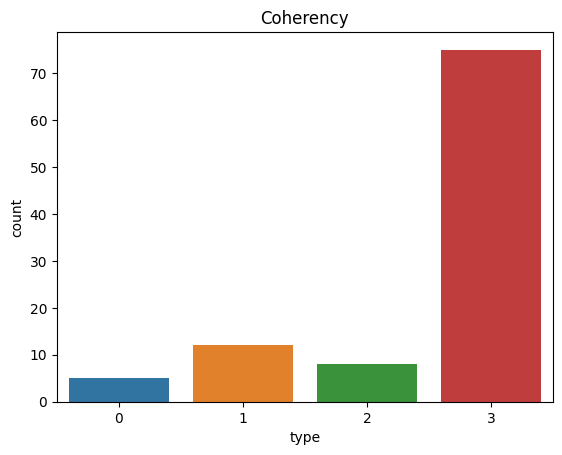

In [24]:
import seaborn as sns
import pandas as pd

coh_df = pd.DataFrame({"type": list(range(4)), "count": coherency})
ax = sns.barplot(data=coh_df, x="type", y="count")
ax.set_title("Coherency")

Text(0.5, 1.0, 'Relevancy')

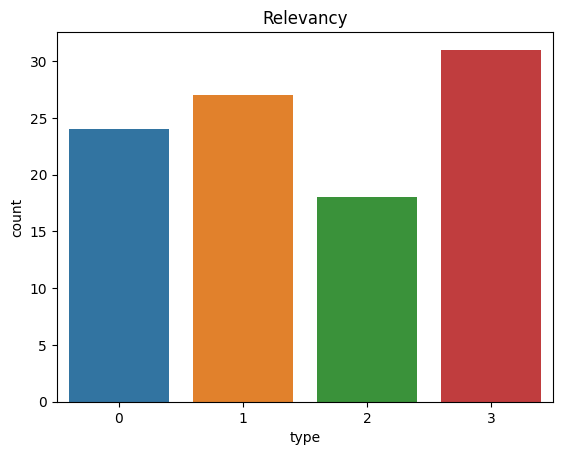

In [25]:
rel_df = pd.DataFrame({"type": list(range(4)), "count": relevancy})
ax = sns.barplot(data=rel_df, x="type", y="count")
ax.set_title("Relevancy")

In [26]:
rel_coh_df = pd.concat([coh_df, rel_df])
rel_coh_df["score"] = ["coherency"] * 4 + ["relevancy"] * 4

In [27]:
rel_coh_df

,type,count,score
0,0,5,coherency
1,1,12,coherency
2,2,8,coherency
3,3,75,coherency
0,0,24,relevancy
1,1,27,relevancy
2,2,18,relevancy
3,3,31,relevancy


<AxesSubplot: xlabel='type', ylabel='count'>

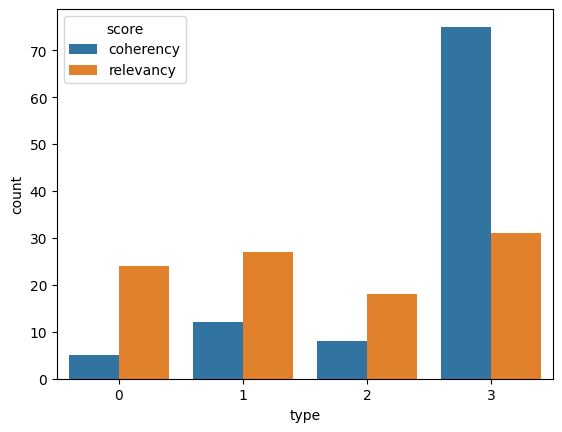

In [28]:
sns.barplot(data=rel_coh_df, x="type", y="count", hue="score")

In [6]:
from utils import read_json

critic_eval = read_json("outputs/human_eval_100_t5_critic_new.json")

In [8]:
coherence = [0, 0, 0, 0]
relevance = [0, 0, 0, 0]

for sample in critic_eval:
    coherence[sample["coherence"]] += 1
    relevance[sample["relevance"]] += 1

In [9]:
coherence, relevance

([6, 21, 16, 57], [22, 28, 24, 26])

Text(0.5, 1.0, 'Coherence')

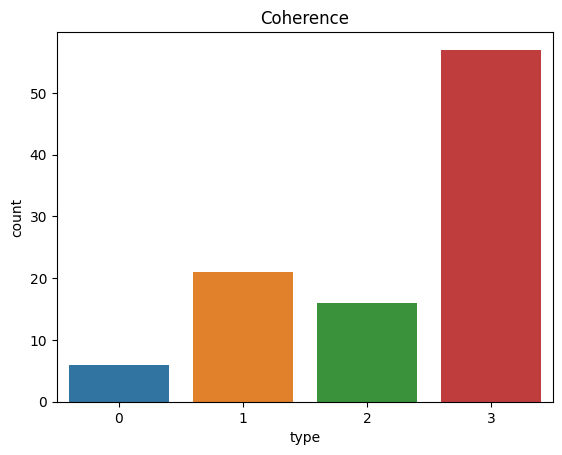

In [10]:
import seaborn as sns
import pandas as pd

coh_df = pd.DataFrame({"type": list(range(4)), "count": coherence})
ax = sns.barplot(data=coh_df, x="type", y="count")
ax.set_title("Coherence")

Text(0.5, 1.0, 'Relevance')

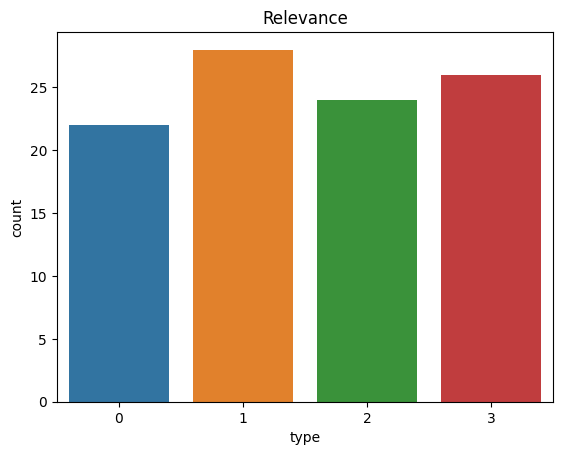

In [11]:
rel_df = pd.DataFrame({"type": list(range(4)), "count": relevance})
ax = sns.barplot(data=rel_df, x="type", y="count")
ax.set_title("Relevance")

In [16]:
from utils import read_json, write_json, NORM_TOKEN

data = read_json("data/moral_stories/norm-actions+context+consequences/norm_distance/critic_train_prep_aligned_final.json")

for sample in data:
    c_inputs = sample["critic_input"].split(NORM_TOKEN)
    sample["critic_input"] = c_inputs[0] + NORM_TOKEN + c_inputs[1].lower()

write_json(data, "data/moral_stories/norm-actions+context+consequences/norm_distance/critic_train_prep_aligned_final.json")

In [22]:
from utils import read_json, write_json, read_jsonl

original_data = read_jsonl("data/moral_stories/norm-actions+context+consequences/norm_distance/train.jsonl")
data = read_json("data/moral_stories/norm-actions+context+consequences/norm_distance/critic_train_prep_aligned.json")

original_data_map = {}

for sample in original_data:
    original_data_map[sample["ID"]] = sample

for sample in data:
    sample["moral_consequence"] = original_data_map[sample["id"]]["moral_consequence"]
    sample["immoral_consequence"] = original_data_map[sample["id"]]["immoral_consequence"]

write_json(data, "data/moral_stories/norm-actions+context+consequences/norm_distance/critic_train_prep_aligned.json")

In [2]:
from utils import read_json

train_data = read_json("data/moral_stories/critic_train_prep.json")

In [16]:
from utils import has_overlap, get_words
from tqdm import tqdm

words_map = []
overlap_pairs = []

for sample in tqdm(train_data, total=len(train_data), desc="Collecting words"):
    context = " ".join([sample["situation"], sample["intention"], sample["moral_action"], sample["immoral_action"]])
    words_map.append({
        "id": sample["id"],
        "context": context,
        "norm": sample["norm"], 
        "words": get_words(context, ignore_stopwords=True, ignore_entities=True)
    })

for i, sample1 in tqdm(enumerate(words_map), total=len(words_map), desc="Analyzing", leave=True):
# for i, sample1 in enumerate(train_data):
    for j, sample2 in enumerate(words_map[i+1:]):
        overlap = set(sample1["words"]).intersection(set(sample2["words"]))
        if len(overlap) / len(sample1["words"]) > 0.5 or len(overlap) / len(sample2["words"]) > 0.5:
            overlap_pairs.append({
                "id1": sample1["id"], 
                "id2": sample2["id"], 
                "context1": sample1["context"], 
                "context2": sample2["context"],
                "norm1": sample1["norm"],
                "norm2": sample2["norm"], 
                "overlap": list(overlap)
            })

Analyzing: 100%|██████████| 10000/10000 [02:21<00:00, 70.49it/s] 


In [17]:
len(overlap_pairs)

4223

In [18]:
from utils import write_json

for p in overlap_pairs:
    p["overlap"] = list(p["overlap"])

write_json(overlap_pairs, "overlap_pairs.json")

In [11]:
overlap_pairs

[{'id1': '3SNVL38CI5QVA73FP6KQLCLDB90CKZ1',
  'id2': '3B2X28YI3XD51NQK92UU09ADRHV6B71',
  'overlap': {"'s",
   'a',
   'and',
   'ask',
   'be',
   'busy',
   'for',
   'he',
   'help',
   'his',
   'john',
   'move',
   'respond',
   'tell',
   'to',
   'too',
   'want'}},
 {'id1': '33C7UALJVMWRS3RG0KY3EBTVC9K18E1',
  'id2': '338JKRMM27XGF259Z7L22PFXJ6SAH61',
  'overlap': {'a',
   'all',
   'and',
   'be',
   'boss',
   'day',
   'have',
   'he',
   'his',
   'in',
   'morning',
   'night',
   'of',
   'off',
   'personal',
   'schedule',
   'series',
   'sick',
   'stay',
   'take',
   'tell',
   'that',
   'the',
   'to',
   'up',
   'use',
   'want',
   'watch',
   'work'}},
 {'id1': '3K4J6M3CXFR2F6AYF13KHP3W4UZAG31',
  'id2': '3KKG4CDWKJW8Y779SUNJC5V98F09481',
  'overlap': {"'s",
   'accident',
   'and',
   'answer',
   'ask',
   'be',
   'by',
   'cost',
   'cover',
   'damage',
   'drop',
   'for',
   'friend',
   'his',
   'it',
   'necessary',
   'of',
   'repair',
   'the',
 

In [2]:
from utils import read_json, get_overlap
from tqdm import tqdm
overlap_pairs = read_json("outputs/train_overlap_pairs.json")

for pair in tqdm(overlap_pairs, total=len(overlap_pairs), desc="Analyzing"):
    overlap, overlap_level1, overlap_level2 = get_overlap(pair["norm1"], pair["norm2"], ignore_entities=True, ignore_stopwords=True)
    pair["norm_similarity"] = max(overlap_level1, overlap_level2)

Analyzing: 100%|██████████| 4223/4223 [00:09<00:00, 462.42it/s]  


In [3]:
similar_norm_pairs = []
for pair in overlap_pairs:
    if pair["norm_similarity"] > 0.5:
        similar_norm_pairs.append(pair)

In [4]:
len(similar_norm_pairs)

171

In [5]:
similar_norm_pairs

[{'id1': '3H7XDTSHKDPZMJD1G6ZCZE0NW7DWGZ1',
  'id2': '3D4CH1LGEBROAN0TNVPKLUSCYQM9GK1',
  'context1': "Felicity is not feeling well, but she feels she has to go to work. Felicity wants to make sure that the report she was working on gets finished. Felicity calls her boss to tell him she won't be in because she's sick and asks if someone can finish her report. Felicity goes to work sick to finish working on her report.",
  'context2': "Lucas feels sick this morning and wonders whether he should go to the office today. Lucas wants his boss to think he is a good employee. Lucas calls his boss and tells him he won't go to the office today because he doesn't want anyone in the office to catch his bug. Lucas goes to the office and doesn't mention feeling sick.",
  'norm1': "It's fine to take off work if you're sick.",
  'norm2': "It's wrong to come to work sick.",
  'overlap': ['want', 'call', 'feel', 'go', 'will', 'tell', 'sick', 'boss'],
  'norm_similarity': 0.6666666666666666},
 {'id1': '

In [6]:
from utils import write_json

write_json(overlap_pairs, "outputs/train_overlap_pairs.json")

In [9]:
from utils import read_json, write_json

data = read_json("data/moral_stories/critic_train_prep.json")

for sample in data:
    sample["fake_norms"] = sample["fake_norms"][:-1]
    sample["fake_norm_sentiments"] = sample["fake_norm_sentiments"][:-1]
    sample["fake_norm_concepts"] = sample["fake_norm_concepts"][:-1]

write_json(data, "data/moral_stories/critic_train_prep.json")